# Project: Nutritional Analysis and Visualization of Foods

## Objective:

Create visualizations that differentiate healthier food items from unhealthier ones based on their nutritional content and display the number of nutrients present in different types of meals.

## Dataset:



https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods

## Key Steps:

### 1.Data Collection:

Load the dataset using pandas.

### 2.Data Cleaning:


Handle missing values.
Standardize nutrient values (e.g., per 100g).

### 3.Define Healthy and Unhealthy Criteria:

Establish criteria for what constitutes healthy and unhealthy foods 
(e.g., based on calorie content, fat, sugar, etc.).

## CODE:

In [139]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For getting plots in the Notebook
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'

In [111]:
# Load Data
data = pd.read_csv('/Users/apsarg/Downloads/nutrients_csvfile.csv')

# Data Cleaning
# In this dataset instead of Null/NA there is 't', so in excel I have replaced all occurance of 't' with 0
data = data.fillna(0)

# EDA
data.describe()

,Protein,Sat.Fat,Carbs
count,335.000000,335.000000,335.000000
mean,8.573134,6.400000,24.982388
std,17.733722,18.468812,35.833106
min,-1.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000
50%,3.000000,0.000000,14.000000
75%,12.000000,7.500000,30.500000
max,232.000000,234.000000,236.000000


In [11]:
# list of first five rows
data.head(5)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36.0,0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0,24.0,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23.0,1.4,119.0,Dairy products


In [12]:
# List of last five rows
data.tail(5)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
330,Fruit-flavored soda,12 oz.,346,161,0,0,0.0,0,42.0,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0.0,0,28.0,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0.0,0,35.0,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,0,0,0.0,0,1.0,"Drinks,Alcohol, Beverages"
334,Tea,1 cup,230,4,0,0,0.0,0,1.0,"Drinks,Alcohol, Beverages"


In [13]:
# shape 
data.shape

(335, 10)

In [129]:
# Define criteria for healthy and unhealthy
# Minimum Caloric Needs:
# Sedentary Women: At least 1,800 calories per day.
# Sedentary Men: At least 2,400 calories per day.
# Lets take Average Calories be : 2000 per day


columns_to_convert = ['Calories', 'Protein', 'Fat', 'Carbs', 'Fiber', 'Sat.Fat']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
healthy_threshold = {
    'calories': 800,
    'fat': 25,  # in grams
    'fiber': 2, # in grams
    'sat.fat': 25, #in grams
    'protein': 10 #in grams
}

def categorize_food(row):
    if (
        row['Fiber'] >= healthy_threshold['fiber'] and row['Fat'] <= healthy_threshold['fat'] and
        row['Sat.Fat'] <= healthy_threshold['sat.fat'] and row['Protein'] >= healthy_threshold['protein']):
        return 'Healthy'
    elif (row['Calories'] <= 25):
        return 'Healthy'
    elif (row['Fat'] == 0 or
        row['Sat.Fat'] == 0) and (row['Calories'] <=100) :
        return 'Healthy'
    elif (row['Fat'] >= 60 or
        row['Sat.Fat'] >= 60 ):
        return 'Unhealthy'
    elif (row['Calories'] != 0) and row['Protein'] ==0 :
        return 'Unhealthy'
    elif row['Protein'] >=50 :
        return 'Healthy'
    elif row['Calories'] <= 150:
        return 'Healthy'
    else:
        return 'Unhealthy'

data['health_category'] = data.apply(categorize_food, axis=1)

print(data['health_category']=='Healthy')


0      False
1      False
2       True
3      False
4       True
       ...  
330    False
331    False
332    False
333     True
334     True
Name: health_category, Length: 335, dtype: bool


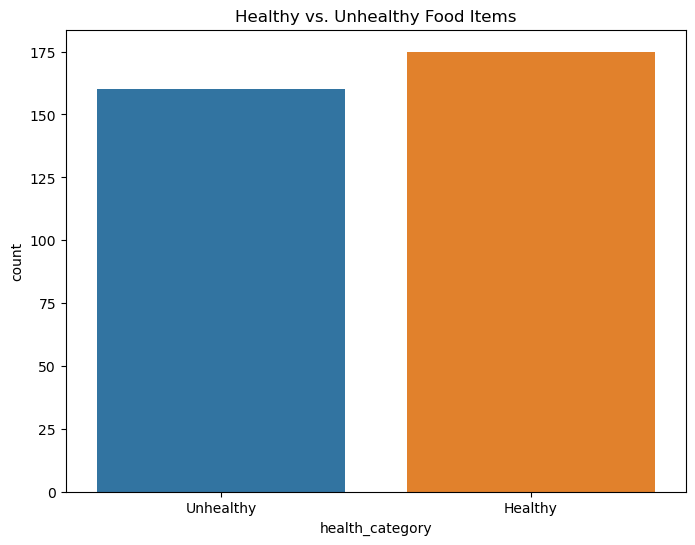

In [130]:
# Plot the number of healthy vs. unhealthy food items
plt.figure(figsize=(8, 6))
sns.countplot(x='health_category', data=data)
plt.title('Healthy vs. Unhealthy Food Items')
plt.show()


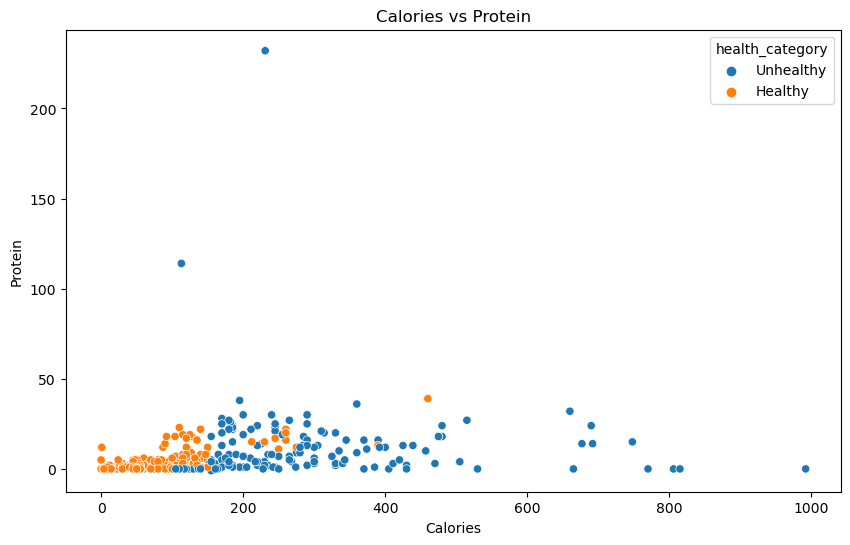

In [131]:
# Scatter plot for calories vs nutrients
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Calories', y='Protein', hue='health_category')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

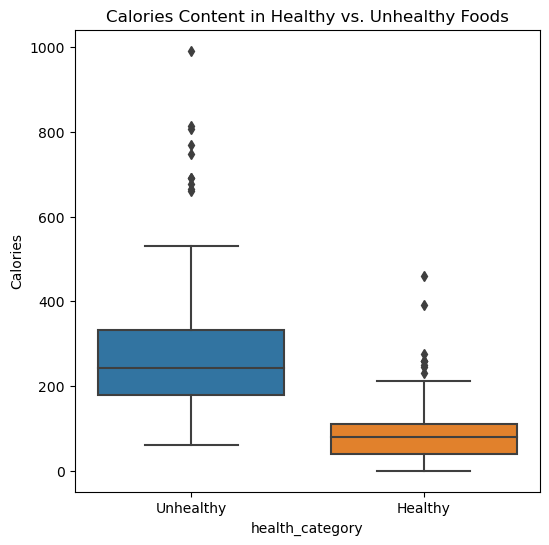

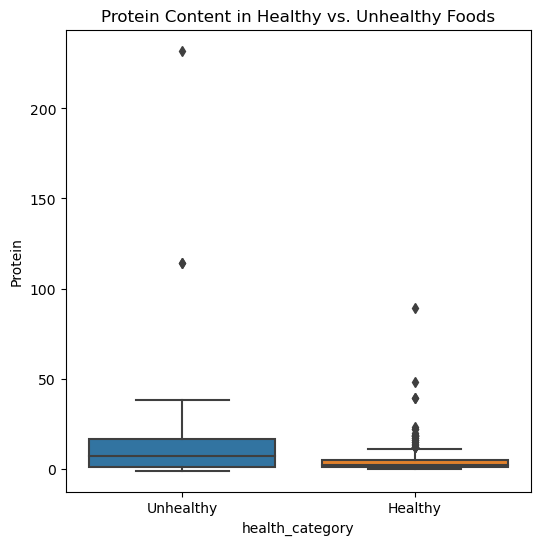

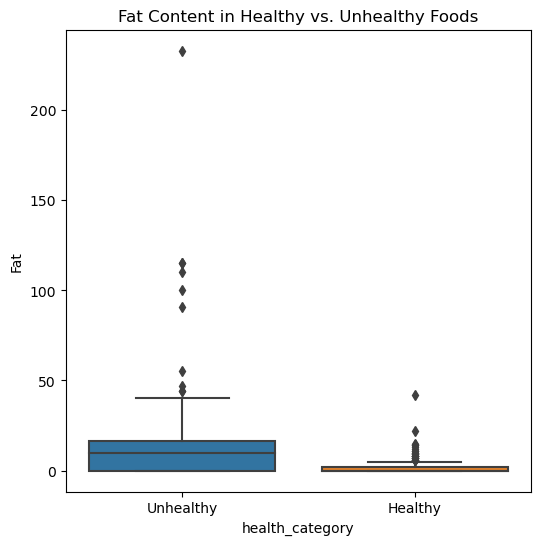

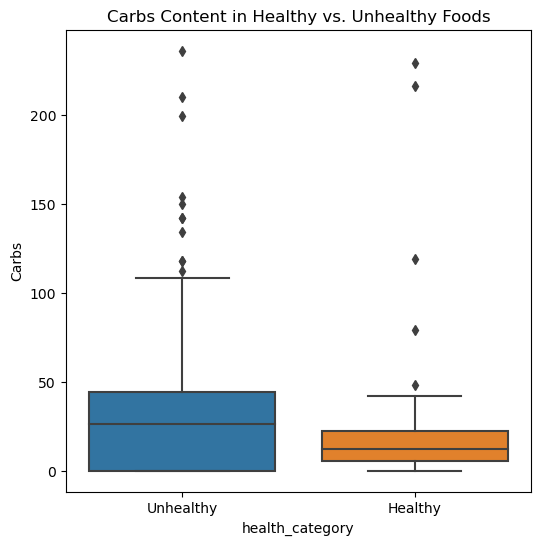

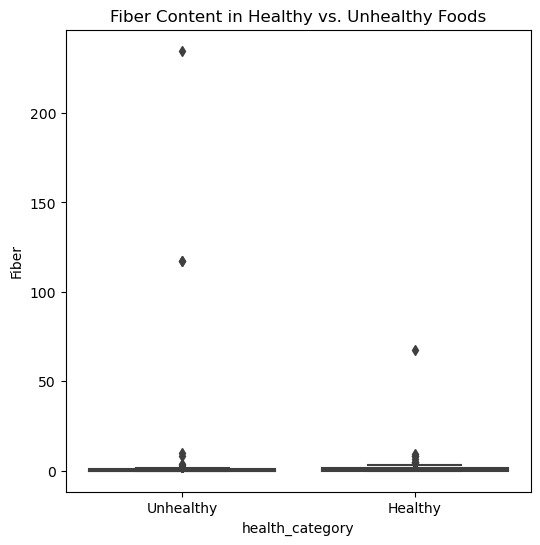

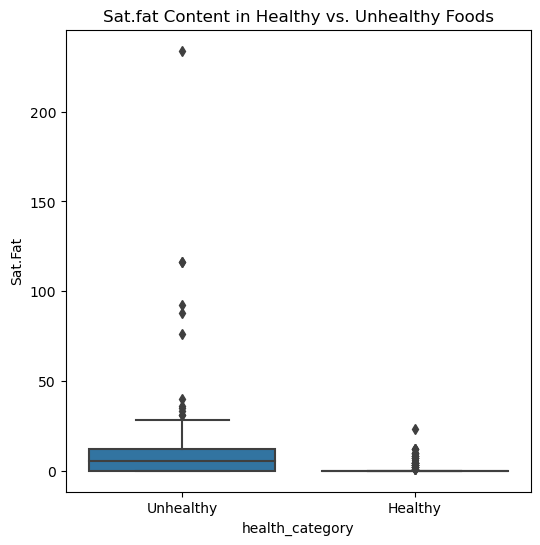

In [140]:
# Plot the nutrient content in healthy vs. unhealthy foods
nutrients = ['Calories', 'Protein', 'Fat', 'Carbs', 'Fiber','Sat.Fat']
for nutrient in nutrients:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='health_category', y=nutrient, data=data)
    plt.title(f'{nutrient.capitalize()} Content in Healthy vs. Unhealthy Foods')
    plt.show()

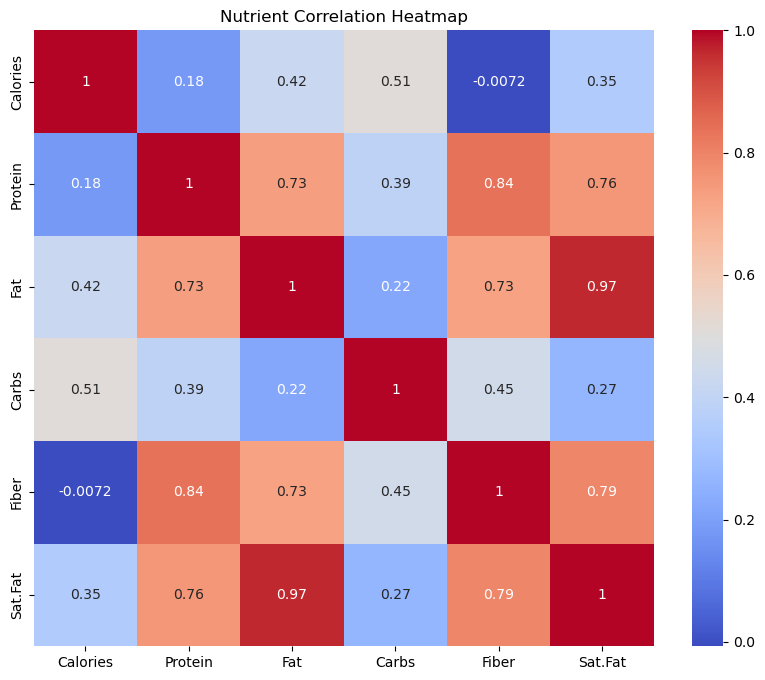

In [116]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[nutrients].corr(), annot=True, cmap='coolwarm')
plt.title('Nutrient Correlation Heatmap')
plt.show()

In [128]:
# Interactive Plotly visualization
fig = px.scatter(data, x='Calories', y='Protein', color='health_category', title='Calories vs Protein (Interactive)',
                color_discrete_sequence=["red", "green"])
fig.show()


<Axes: ylabel='health_category'>

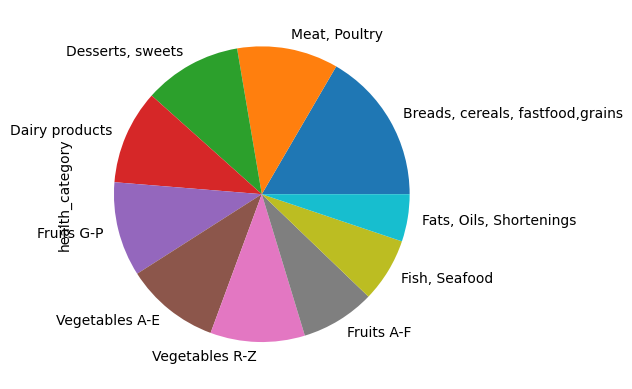

In [135]:
# The top 10 categories with the highest counts of items classified by their healthiness category. 

data.groupby('Category')['health_category'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: xlabel='Category', ylabel='Calories'>

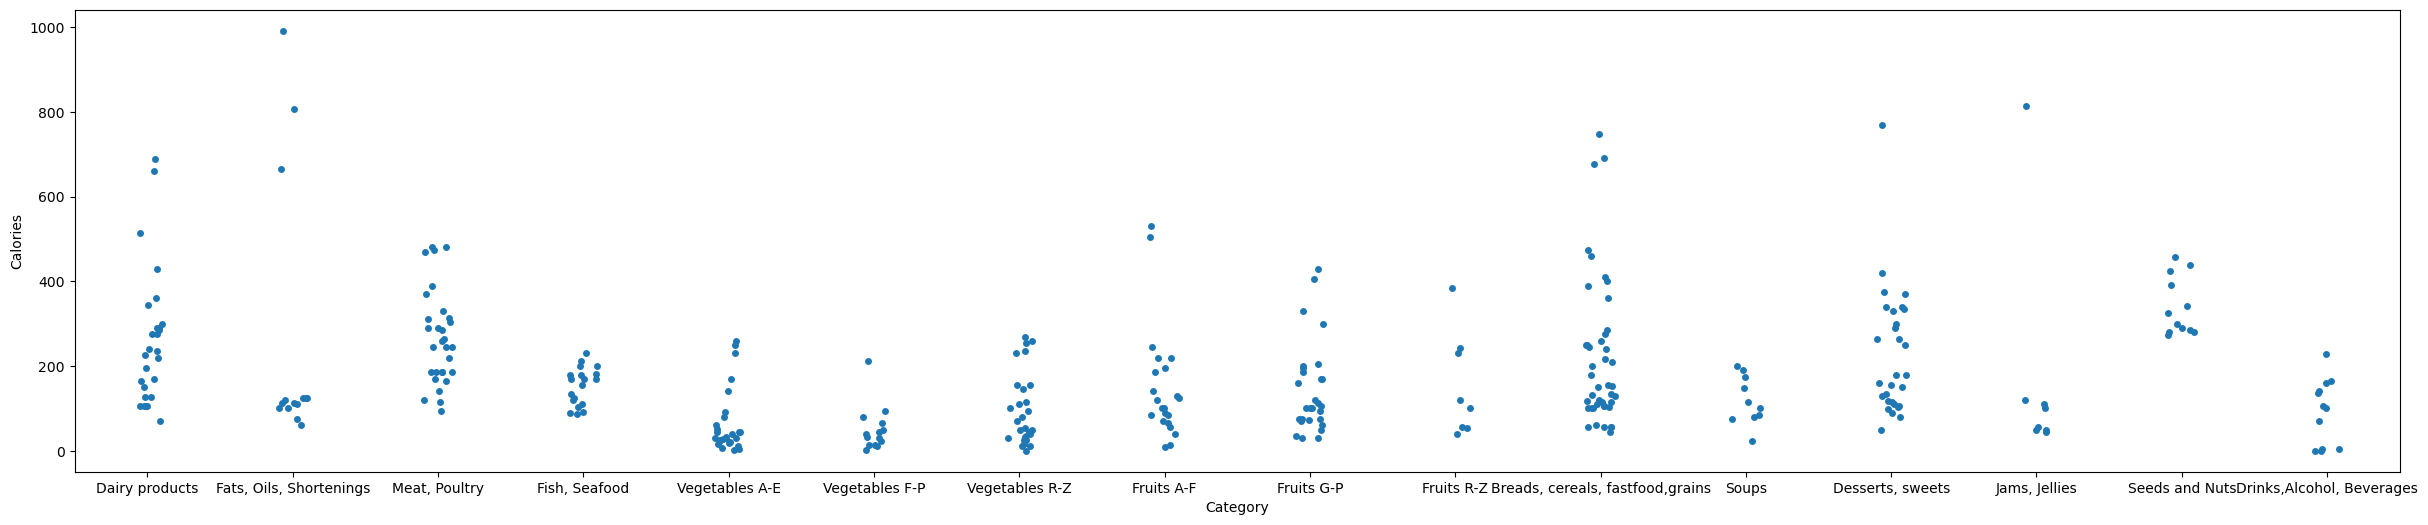

In [154]:
# Plot for defining Calerios in Each Category Of Food items
plt.figure(figsize=(30,6))
sns.stripplot(x="Category", y="Calories", data=data,jitter=True)

# WE can see we have high Calories in Oils,Cereals/FastFood and Jams . But overall the density of 
# HIGH CALORIES Food is in Fastfood items.
# On the other hand some beverages , Vegetables and fruits have less calories Compared to any other category.

# DOUBLE-TAP on the plot below to ZOOM.

<Axes: xlabel='Category', ylabel='Protein'>

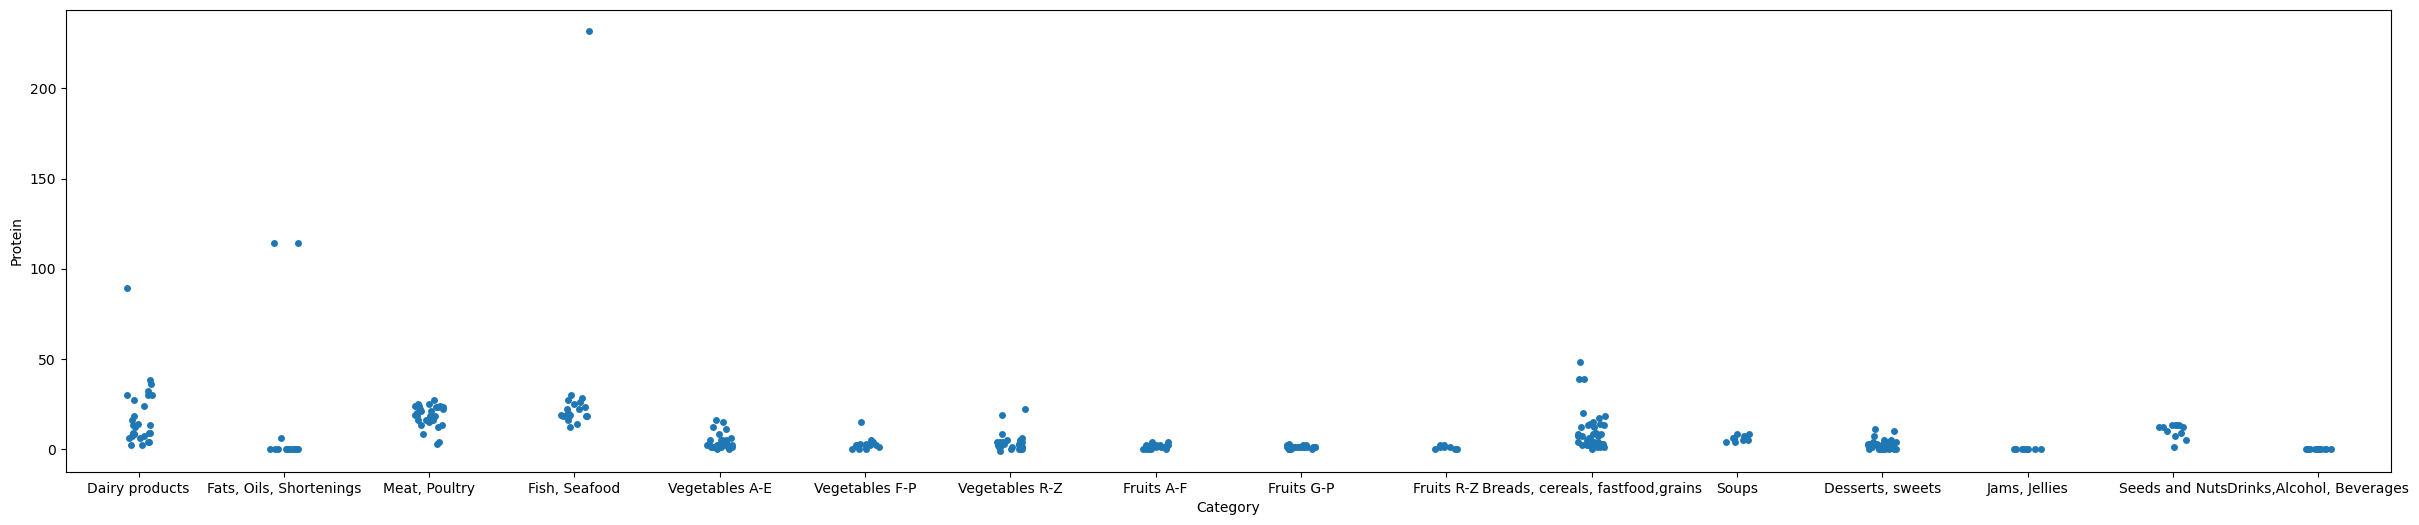

In [155]:
# Plot for defining Protein in Each Category Of Food items
plt.figure(figsize=(30,6))
sns.stripplot(x="Category", y="Protein", data=data,jitter=True)

# WE can see we have high Protein in Fish,Meats,Dairy Products, . But overall the density of 
# HIGH Protein category is Non-Veg and Dairy Product.

# DOUBLE-TAP on the plot below to ZOOM.

<Axes: xlabel='Category', ylabel='Fat'>

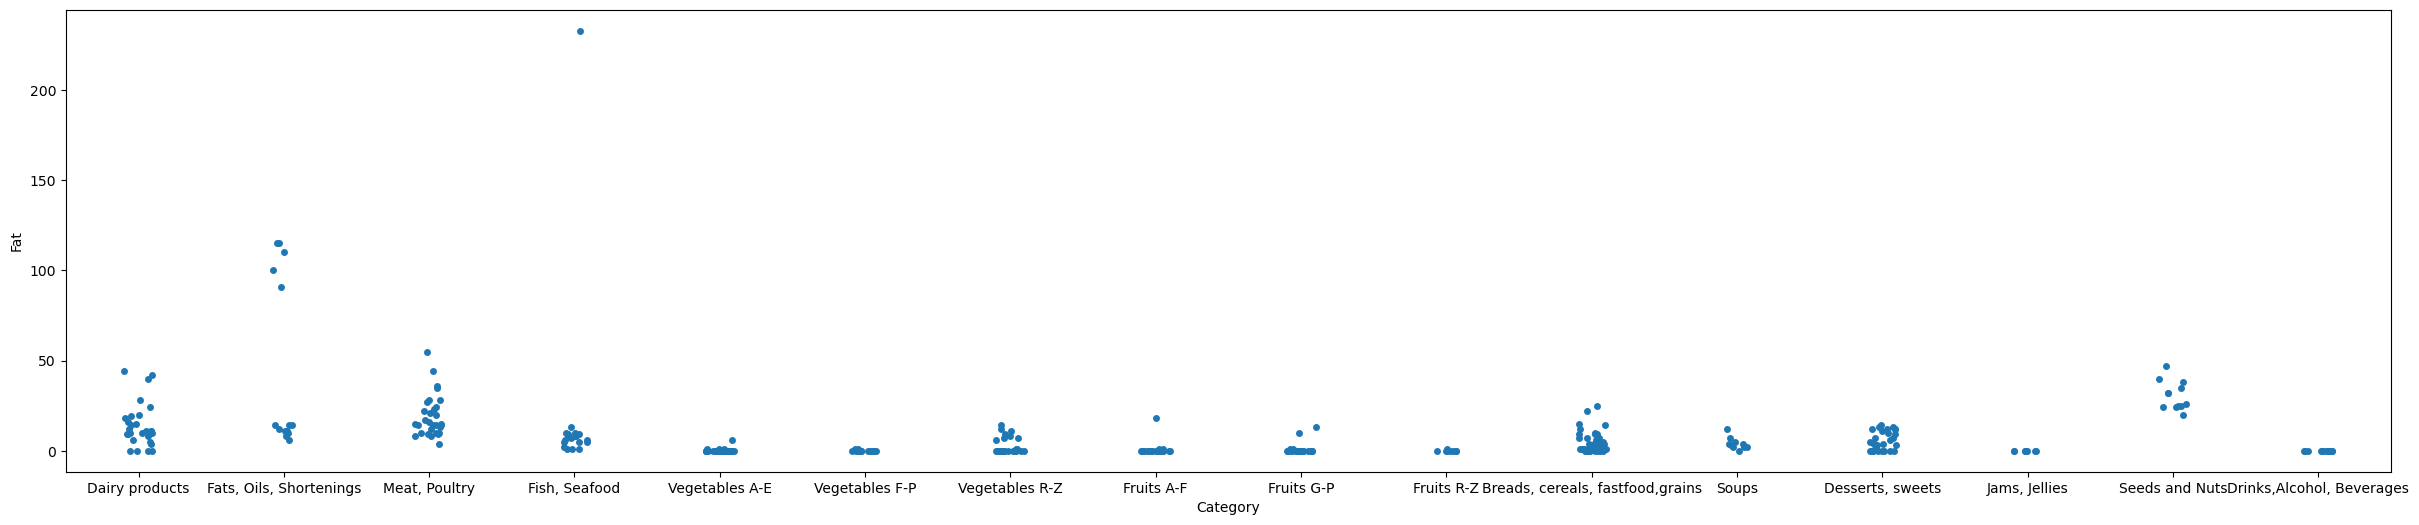

In [156]:
# Plot for defining Fats in Each Category Of Food items
plt.figure(figsize=(30,6))
sns.stripplot(x="Category", y="Fat", data=data,jitter=True)

# WE can see we have high Fats in Oils,Seeds,Nuts and some Meat Products . But overall the density of 
# HIGH Fat category is Oils,Seeds and Nuts.
# We can see Vegetables , fruits, and Drinks/Beverages has comparitively less fat content.

# DOUBLE-TAP on the plot below to ZOOM

In [ ]:
# The Results are for you to Asses and Restructure Your Diet Plan.

# The Data is not Accurate and Measured Correctly , I have just taken a Dataset From net.

# The Clinical Results May be far More Better , Pls Refer Your Nutritionist for More Result.